# CS 595 Data 3

### Student: Sarthak Anand (A20389087)

### Dataset : Mushroom Dataset from UCI

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.

The objective of classification on this dataset is to classify mushrooms as edible or poisonous based the attributes given below.

**Target -> class**: edible=e, poisonous=p
#### Attribute information:
1. **cap-shape**:                bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
2. **cap-surface**:              fibrous=f, grooves=g, scaly=y, smooth=s
3. **cap-color**:                brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
4. **bruises**:                  bruises=t, no=f
5. **odor**:                     almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
6. **gill-attachment**:          attached=a, descending=d, free=f, notched=n
7. **gill-spacing**:             close=c, crowded=w, distant=d
8. **gill-size**:                broad=b, narrow=n
9. **gill-color**:               black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
10. **stalk-shape**:              enlarging=e, tapering=t
11. **stalk-root**:               bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
12. **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s
13. **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s
14. **stalk-color-above-ring**:   brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
15. **stalk-color-below-ring**:   brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
16. **veil-type**:                partial=p, universal=u
17. **veil-color**:               brown=n, orange=o, white=w, yellow=y
18. **ring-number**:              none=n, one=o, two=t
19. **ring-type**:                cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
20. **spore-print-color**:        black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
21. **population**:               abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
22. **habitat**:                  grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d



In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.preprocessing import StandardScaler

### Load Data

In [33]:
df = pd.read_csv("mushrooms.csv")
print("Original Data Shape = ",df.shape)
df = df[df['stalk-root'] != '?']#Stalk root contains some rows with '?' values, so we remove them 
print("Data Shape after dropping objects with missing values = ",df.shape)
df.head(2)

Original Data Shape =  (8124, 23)
Data Shape after dropping objects with missing values =  (5644, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


### One-hot Encoding

In [34]:
# Since the features are categorical, I do one-hot encoding for the 22 features 
# The get_dummies pandas function automatically does one-hot encoding 

for col in df.drop('class',axis=1).columns:
    one_hot = pd.get_dummies(df[col],prefix=col) # prefix is set to orginal col name + feature value so the column name is understandable 
    df.drop(col,axis=1,inplace=True) #drop the column that has been one-hot encoded
    df = df.join(one_hot) # add the new columns to the original frame 
    
# Mapping the values of target class from {p,e} to {0,1}
df['class'] = df['class'].map(lambda x:0 if x == 'p' else 1)
print("Data Shape after One-hot encoding = ",df.shape)
print("\nData after One-hot Encoding:")
df.head(2)

Data Shape after One-hot encoding =  (5644, 99)

Data after One-hot Encoding:


,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [64]:
#Creating Train-Test split with a 2/3 train and 1/3 test split 
X_train, X_test, y_train, y_test = train_test_split(df.drop('class',axis=1), df['class'], test_size=0.33, random_state=42)

In [65]:
#Training Logistic Regresiion classifiers with penalty= 'l2'
LRL2 = LogisticRegression(penalty='l2')
LRL2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
#Training Logistic Regresiion classifiers with penalty= 'l1'
LRL1 = LogisticRegression(penalty='l1')
LRL1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Top 10 Features for Logistic Regression with L2 penalty with original data

In [67]:
top10L2 = np.argsort(np.absolute(LRL2.coef_[0]))[::-1]
print("Logistic Regression L2 penalty Top 10 Features \n")
for x in range(0,10):
    print(" %i) %s \t\t weight: %f"%(x+1,df.columns[top10L2[x]],LRL2.coef_[0][top10L2[x]]))

Logistic Regression L2 penalty Top 10 Features 

 1) odor_m 		 weight: 2.694704
 2) odor_n 		 weight: -2.658317
 3) odor_c 		 weight: -2.358381
 4) ring-type_p 		 weight: -2.358381
 5) bruises_t 		 weight: 2.341907
 6) odor_f 		 weight: 2.340586
 7) odor_a 		 weight: -2.157740
 8) spore-print-color_n 		 weight: -2.144303
 9) stalk-shape_t 		 weight: -1.892655
 10) population_a 		 weight: -1.878381


### Top 10 Features for Logistic Regression with L1 penalty with original data

In [68]:
top10L1 = np.argsort(np.absolute(LRL1.coef_[0]))[::-1]
print("Logistic Regression L1 penalty Top 10 Features \n")
for x in range(0,10):
    print(" %i) %s \t\t weight: %f"%(x+1,df.columns[top10L1[x]],LRL1.coef_[0][top10L1[x]]))

Logistic Regression L1 penalty Top 10 Features 

 1) spore-print-color_n 		 weight: -9.039568
 2) population_a 		 weight: -6.397499
 3) ring-type_p 		 weight: -4.842634
 4) odor_m 		 weight: 4.823935
 5) odor_f 		 weight: 4.631490
 6) bruises_t 		 weight: 4.607351
 7) odor_n 		 weight: -4.317890
 8) odor_a 		 weight: -3.520975
 9) odor_c 		 weight: -3.154035
 10) stalk-shape_e 		 weight: 1.813463


### Decision Tree with original data

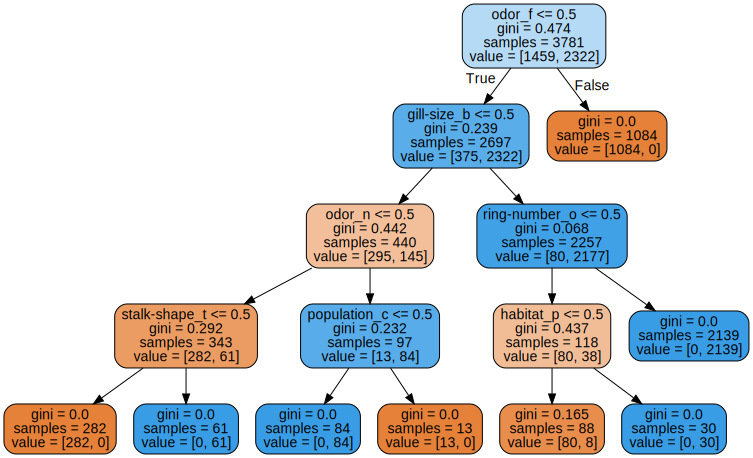

In [69]:
DT = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005)
DT.fit(X_train,y_train)
pred1 = DT.predict(X_test)

dot_data = tree.export_graphviz(DT, out_file=None,feature_names = df.drop('class',axis=1).columns,rounded=True,filled=True) 
graph = graphviz.Source(dot_data) 
graph

## Discussion

With the original data, L2, L1 and DT behave very differently. According to L2, odor_m offers the most value , while according to L1,spore_print_color_n offers the most value. This is compeltely different from DT, where according to it, odor_f offers most information gain while odor_m and spore_print_color_n doesnt even appear in the tree. One aspect that is clear however is that odor_f does seem to be important as it appears in the top 10 features for both L2 and L1 as well as DT. 


### Z-Score the Data

In [70]:
scaler = StandardScaler(copy=False)
X_trainZ = scaler.fit_transform(X_train)
X_testZ = scaler.transform(X_test)
print("Data is now Z-Scored")

Data is now Z-Scored


In [71]:
#Training BernoulliNB classifiers with default parameters
LRL2Z = LogisticRegression(penalty='l2')
LRL2Z.fit(X_trainZ, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
#Training Logistic Regresiion classifiers with penalty= 'l1'
LRL1Z = LogisticRegression(penalty='l1')
LRL1Z.fit(X_trainZ, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Top 10 Features for Logistic Regression with L2 penalty with Z-Scored data

In [73]:
top10L2Z = np.argsort(np.absolute(LRL2Z.coef_[0]))[::-1]
print("Logistic Regression L2 penalty Top 10 Features \n")
for x in range(0,10):
    print(" %i) %s \t\t weight: %f"%(x+1,df.columns[top10L2Z[x]],LRL2Z.coef_[0][top10L2Z[x]]))

Logistic Regression L2 penalty Top 10 Features 

 1) odor_n 		 weight: -1.443200
 2) odor_m 		 weight: 1.389477
 3) odor_c 		 weight: -1.227086
 4) ring-type_p 		 weight: -1.227086
 5) odor_a 		 weight: -1.198998
 6) spore-print-color_n 		 weight: -0.814856
 7) population_a 		 weight: -0.771802
 8) odor_f 		 weight: 0.750569
 9) bruises_t 		 weight: 0.742520
 10) stalk-shape_t 		 weight: -0.693988


### Top 10 Features for Logistic Regression with L1 penalty with Z-Scored data

In [74]:
top10L1Z = np.argsort(np.absolute(LRL1Z.coef_[0]))[::-1]
print("Logistic Regression L1 penalty Top 10 Features \n")
for x in range(0,10):
    print(" %i) %s \t\t weight: %f"%(x+1,df.columns[top10L1Z[x]],LRL1Z.coef_[0][top10L1Z[x]]))

Logistic Regression L1 penalty Top 10 Features 

 1) odor_c 		 weight: -3.579328
 2) ring-type_p 		 weight: -2.312230
 3) odor_n 		 weight: -2.145486
 4) odor_a 		 weight: -1.867868
 5) spore-print-color_n 		 weight: -1.507397
 6) odor_m 		 weight: 1.282434
 7) population_a 		 weight: -1.180792
 8) odor_f 		 weight: 0.622844
 9) bruises_t 		 weight: 0.583535
 10) gill-color_y 		 weight: -0.302429


### Decision Tree with Z-Scored data

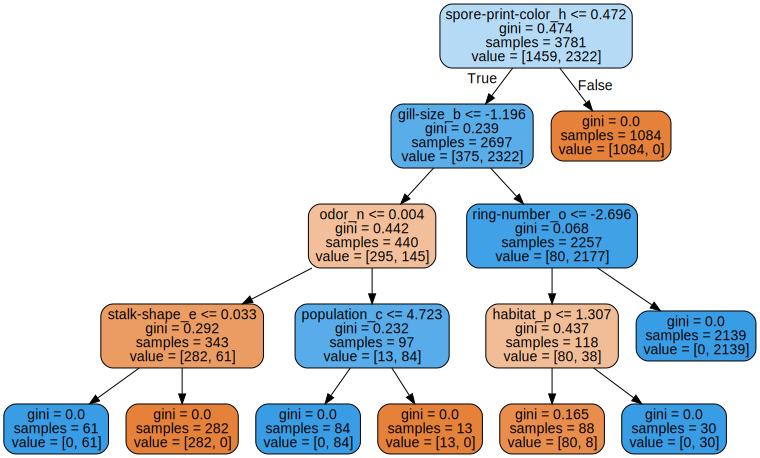

In [75]:
DTZ = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005)
DTZ.fit(X_trainZ,y_train)
pred1 = DT.predict(X_testZ)

dot_data = tree.export_graphviz(DTZ, out_file=None,feature_names = df.drop('class',axis=1).columns,rounded=True,filled=True) 
graph = graphviz.Source(dot_data) 
graph

## Discussion

After Z-Scoring the data L2 and L1 seem to be a lot closer in terms of feature weights. The weights themselves have dropped significantly in terms of value which improves transparency and prevents Logistic Regression from giving high weights to features that do not really make sense. DT however is still very different from L2 and L1. 

In [56]:
probabilities = LRL2Z.predict_proba(X_testZ)

In [57]:
wi_xi =np.multiply(X_testZ,LRL2Z.coef_[0])

total_pos_evi = []
total_neg_evi = []

for r in range(0,X_test.shape[0]):
    
    total_pos_evi.append(np.add(LRL2Z.intercept_[0],np.sum(x for x in wi_xi[r] if x >0)))
    total_neg_evi.append(np.add(LRL2Z.intercept_[0],np.sum(x for x in wi_xi[r] if x <0)))


In [58]:
def get_top_features(row, LRL2Z, row_id):
    wi_xi_row=np.multiply(row,LRL2Z.coef_[0])
     
    top3_pos_ft_ids = np.argsort(wi_xi_row)[::-1][:3] # top 3 positive feature IDs 
    top3_neg_ft_ids = np.argsort(wi_xi_row)[:3]
    
    print("\nd) Top 3 feature values that contribute to postive evidence: ")
    
    for index in top3_pos_ft_ids:
        print("Feature: %s = %f                Feature Evidence: %f"%(X_test.columns[index],row[index],wi_xi_row[index]))
        
    print("\ne) Top 3 feature values that contribute to negative evidence: ")
    
    for index in top3_neg_ft_ids:
        print("Feature: %s = %f                Feature Evidence: %f"%(X_test.columns[index],row[index],wi_xi_row[index]))

### 1. Most Positive object in terms of probablity

In [59]:
id_most_pos = np.argmax(probabilities[:,1])
print("a) Total Positive Evidence = ",total_pos_evi[id_most_pos])
print("b) Total Negative Evidence = ", total_neg_evi[id_most_pos])
print("c) Probability Distribution = ", probabilities[id_most_pos])
get_top_features(X_testZ[id_most_pos],LRL2Z,id_most_pos)

a) Total Positive Evidence =  13.6222019341
b) Total Negative Evidence =  -1.83438754611
c) Probability Distribution =  [  1.90935898e-05   9.99980906e-01]

d) Top 3 feature values that contribute to postive evidence: 
Feature: odor_n = 1.034173                Feature Evidence: 1.472683
Feature: ring-type_e = 2.441960                Feature Evidence: 1.083279
Feature: stalk-root_b = -1.429784                Feature Evidence: 0.996314

e) Top 3 feature values that contribute to negative evidence: 
Feature: habitat_g = 1.437534                Feature Evidence: -0.397002
Feature: spore-print-color_k = -0.703183                Feature Evidence: -0.379689
Feature: habitat_d = -0.888958                Feature Evidence: -0.252881


### 2. Most Negative object in terms of probablity

In [60]:
id_most_neg = np.argmax(probabilities[:,0])
print("a) Total Positive log Evidence = ",total_pos_evi[id_most_neg])
print("b) Total Negative log Evidence = ", total_neg_evi[id_most_neg])
print("c) Probability Distribution = ", probabilities[id_most_neg])
get_top_features(X_testZ[id_most_neg],LRL2Z,id_most_neg)

a) Total Positive log Evidence =  2.52053787247
b) Total Negative log Evidence =  -16.0179763962
c) Probability Distribution =  [  9.99999453e-01   5.46837222e-07]

d) Top 3 feature values that contribute to postive evidence: 
Feature: odor_p = -0.216976                Feature Evidence: 0.319017
Feature: odor_c = -0.198261                Feature Evidence: 0.250041
Feature: cap-surface_s = -0.538928                Feature Evidence: 0.142782

e) Top 3 feature values that contribute to negative evidence: 
Feature: odor_f = 1.586572                Feature Evidence: -1.950623
Feature: spore-print-color_h = 1.586572                Feature Evidence: -1.950623
Feature: odor_n = -0.966957                Feature Evidence: -1.376966


### 3. Object that has highest Postive evidence 

In [61]:
id_most_pos_evi = np.argmax(total_pos_evi)
print("a) Total Positive Evidence = ",total_pos_evi[id_most_pos_evi])
print("b) Total Negative Evidence = ", total_neg_evi[id_most_pos_evi])
print("c) Probability Distribution = ", probabilities[id_most_pos_evi])
get_top_features(X_testZ[id_most_pos_evi],LRL2Z,id_most_pos_evi)

a) Total Positive Evidence =  17.7439058013
b) Total Negative Evidence =  -22.921984544
c) Probability Distribution =  [ 0.9977616  0.0022384]

d) Top 3 feature values that contribute to postive evidence: 
Feature: spore-print-color_w = 5.859731                Feature Evidence: 2.793550
Feature: stalk-root_c = 2.996040                Feature Evidence: 1.897184
Feature: odor_n = 1.034173                Feature Evidence: 1.472683

e) Top 3 feature values that contribute to negative evidence: 
Feature: population_c = 10.497899                Feature Evidence: -7.940240
Feature: stalk-color-below-ring_y = 27.480902                Feature Evidence: -2.340539
Feature: veil-color_y = 27.480902                Feature Evidence: -2.340539


### 4. Object that has highest Negative evidence

In [62]:
id_most_neg_evi = np.argmin(total_neg_evi)
print("a) Total Positive Evidence = ",total_pos_evi[id_most_neg_evi])
print("b) Total Negative Evidence = ", total_neg_evi[id_most_neg_evi])
print("c) Probability Distribution = ", probabilities[id_most_neg_evi])
get_top_features(X_testZ[id_most_neg_evi],LRL2Z,id_most_neg_evi)

a) Total Positive Evidence =  17.6130086186
b) Total Negative Evidence =  -24.1734364979
c) Probability Distribution =  [  9.99437245e-01   5.62754892e-04]

d) Top 3 feature values that contribute to postive evidence: 
Feature: spore-print-color_w = 5.859731                Feature Evidence: 2.793550
Feature: stalk-root_c = 2.996040                Feature Evidence: 1.897184
Feature: odor_n = 1.034173                Feature Evidence: 1.472683

e) Top 3 feature values that contribute to negative evidence: 
Feature: population_c = 10.497899                Feature Evidence: -7.940240
Feature: stalk-color-above-ring_y = 27.480902                Feature Evidence: -2.340539
Feature: stalk-color-below-ring_y = 27.480902                Feature Evidence: -2.340539


### 5. Most Uncertain object

In [63]:
id_most_neutral = np.argmin(np.absolute(np.subtract(probabilities[:,0], probabilities[:,1])))
print("a) Total Positive Evidence = ",total_pos_evi[id_most_neutral])
print("b) Total Negative Evidence = ", total_neg_evi[id_most_neutral])
print("c) Probability Distribution = ", probabilities[id_most_neutral])
get_top_features(X_testZ[id_most_neutral],LRL2Z,id_most_neutral)

a) Total Positive Evidence =  11.8432497436
b) Total Negative Evidence =  -13.7276576557
c) Probability Distribution =  [ 0.94300368  0.05699632]

d) Top 3 feature values that contribute to postive evidence: 
Feature: spore-print-color_w = 5.859731                Feature Evidence: 2.793550
Feature: odor_n = 1.034173                Feature Evidence: 1.472683
Feature: cap-shape_k = 12.782461                Feature Evidence: 0.836658

e) Top 3 feature values that contribute to negative evidence: 
Feature: population_c = 10.497899                Feature Evidence: -7.940240
Feature: gill-size_b = -2.619295                Feature Evidence: -0.785069
Feature: gill-size_n = 2.619295                Feature Evidence: -0.785069
